# Introduction
The purpose of this project is to conduct some simple stock data manipulation, data visualisation and analysis in Python.

To start with, historical stock prices are extracted from pandas web-data reader Yahoo Finance and pandas. Using this data, we can conduct some starting calculations to understand individual and peer relative stock behaviour.
The analysis includes moving average, stock returns, risk, covariance and correlation.  

The security of focus for this project is Zoetis, and its US peer Eily Lilly and Company.  Zoetis is the world's largest producer of medicine and vaccinations for pets and livestock.  A subsidiary of Pfizer (83% interest of the firm), Zoetis is now an independent company and a member of the S&P 500 index.



# Import Python packages




In [102]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt


# Pull  Zoetis stock data


In [103]:
ZTS=wb.DataReader('ZTS',data_source='yahoo', start='2013-2-1')

In [104]:
ZTS.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-02-01,31.74,30.469999,31.50,31.010000,66789100.0,29.255459
2013-02-04,31.99,30.760000,31.09,31.020000,7695400.0,29.264904
2013-02-05,31.98,30.850000,31.25,31.040001,5013200.0,29.283766
2013-02-06,31.43,30.750000,30.98,31.030001,2126100.0,29.274336
2013-02-07,32.73,31.000000,31.00,32.000000,3800800.0,30.189455


In [105]:
ZTS.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-31,165.679993,163.229996,164.500000,165.500000,1292600.0,165.500000
2021-01-04,166.240005,160.720001,166.000000,163.589996,1805900.0,163.589996
2021-01-05,165.289993,162.500000,163.149994,164.729996,1358600.0,164.729996
2021-01-06,167.910004,162.669998,162.919998,167.149994,2139800.0,167.149994
2021-01-07,168.750000,166.699997,167.449997,167.000000,1710157.0,167.000000


# Rolling mean (moving average)
Moving average is a simple tool of technical analysis which smooths out price data by creating a 'constantly updated' average price.

This helps to eliminate any 'noise' and shows the general trend of the price data over time.

We use adjusted closing price data for prices, which is the closing stock price adjusted for dividend payments and stock splits.


In [106]:
closing_price=ZTS['Adj Close']
moving_average= closing_price.rolling(window=100).mean()
moving_average
#this will calculate MA for last 100 days of stock's closing price and take the average for each of the window's MA.

Date
2013-02-01           NaN
2013-02-04           NaN
2013-02-05           NaN
2013-02-06           NaN
2013-02-07           NaN
                 ...    
2020-12-31    161.459876
2021-01-04    161.528438
2021-01-05    161.584130
2021-01-06    161.668916
2021-01-07    161.770380
Name: Adj Close, Length: 1998, dtype: float64

# Moving average with stock price 
Plot adjusted closing price alongside moving average in a chart.


In [107]:
#import matplotlib libraries
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style


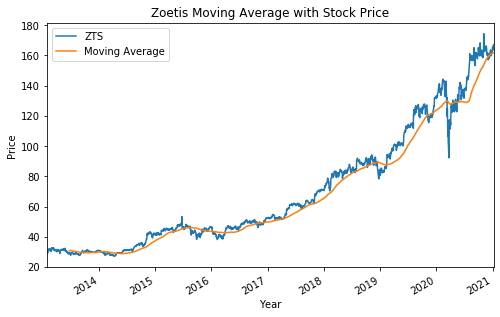

In [108]:
#plot graph and add labels and title
closing_price.plot(label='ZTS', figsize=(8,5))
moving_average.plot(label='Moving Average')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Zoetis Moving Average with Stock Price')
plt.legend()

In the chart above, the moving average displays an increasing trend in Zoetis' stock price.


# Simple rate of return calculation
Percentage increase/decrease in stock price from the previous period.

In [109]:
#use 'shift' function to indicate number of lags of variable
ZTS['simple return']=(ZTS['Adj Close']/ZTS['Adj Close'].shift(1))-1
print(ZTS['simple return'])

Date
2013-02-01         NaN
2013-02-04    0.000323
2013-02-05    0.000645
2013-02-06   -0.000322
2013-02-07    0.031260
                ...   
2020-12-31    0.007488
2021-01-04   -0.011541
2021-01-05    0.006969
2021-01-06    0.014691
2021-01-07   -0.000897
Name: simple return, Length: 1998, dtype: float64


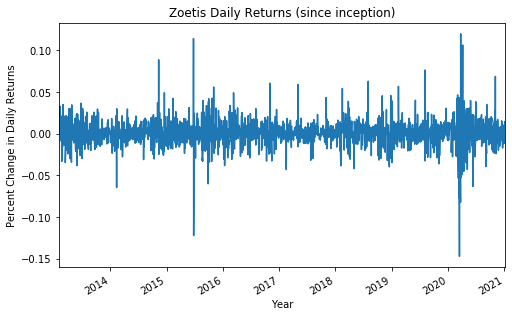

In [110]:
ZTS['simple return'].plot(figsize=(8,5))
plt.xlabel('Year')
plt.ylabel('Percent Change in Daily Returns')
plt.title('Zoetis Daily Returns (since inception)')
plt.show()

In [111]:
#use 'mean' function to calculate average daily return
average_daily_return= ZTS['simple return'].mean()
average_daily_return


0.0009979399832249266

In [112]:
#an average annual return will tell us more than a daily return.
#number of trading days (excluding weekends and bank holidays ) is approx 250
average_annual_return=ZTS['simple return'].mean()*250
average_annual_return


0.24948499580623165

In [113]:
#make this presentable - round this value to 3 d.p & add percentage sign
print("The annual average return for Zoetis is", round(average_annual_return,5)*100,"%")



The annual average return for Zoetis is 24.948 %


# Calculating the risk of a security

Load the data from Yahoo Finance as before and save in a data frame object called security_data.

Here, we are extracting data for Zoetis and its US peer Eli Lilly and Company.




In [114]:
tickers=['ZTS','LLY']

security_data=pd.DataFrame()

for t in tickers:
    security_data[t]=wb.DataReader(t, data_source='yahoo', start='2013-2-1')['Adj Close']
    

In [115]:
security_data.tail()

,ZTS,LLY
Date,,
2020-12-31,165.500000,168.839996
2021-01-04,163.589996,165.500000
2021-01-05,164.729996,166.320007
2021-01-06,167.149994,164.320007
2021-01-07,167.000000,165.830002


The standard deviation of stock returns is one way to calculate the risk of a security. 

Stock returns with large deviations from the mean are said to be more volatile.

First, we will create a separate table for security returns.


In [116]:
#taking log returns here as we will examine each company separately to understand behaviour of individual stock
security_returns=np.log(security_data/security_data.shift(1))
security_returns


,ZTS,LLY
Date,,
2013-02-01,NaN,NaN
2013-02-04,0.000323,-0.012065
2013-02-05,0.000644,0.010218
2013-02-06,-0.000322,-0.003147
2013-02-07,0.030781,-0.002785
...,...,...
2020-12-31,0.007460,0.010898
2021-01-04,-0.011608,-0.019980
2021-01-05,0.006944,0.004942


# Risk and Return Comparisons


In [117]:
#average daily return
security_returns[['ZTS', 'LLY']].mean()

ZTS    0.000872
LLY    0.000671
dtype: float64

In [118]:
#average annual return
security_returns[['ZTS', 'LLY']].mean()*250

ZTS    0.218068
LLY    0.167730
dtype: float64

In [119]:
#standard deviation
security_returns[['ZTS', 'LLY']].std()

ZTS    0.015837
LLY    0.015468
dtype: float64

In [120]:
#to annualise, also raise to power of 0.5 as stdev is square root of variance.
security_returns[['ZTS', 'LLY']].std()*250**0.5

ZTS    0.250402
LLY    0.244577
dtype: float64

The results above fall in line with theoretical predictions - stocks with higher expected returns often incur more risk.

Zoetis' annual average return is slightly higher than Eli Lilly, however this comes at the expense of higher volatility.

# Covariance and Correlation

Construct a covariance matrix with variance of stock returns along the leading diagonal.


In [121]:
covariance_matrix=security_returns.cov()
covariance_matrix


,ZTS,LLY
ZTS,0.000251,0.000111
LLY,0.000111,0.000239


In [122]:
#annualised covariance
covariance_matrix_a=security_returns.cov()*250
covariance_matrix_a


,ZTS,LLY
ZTS,0.062701,0.027710
LLY,0.027710,0.059818


Construct a correlation matrix using 'corr' function.


In [123]:
correlation_matrix=security_returns.corr()
correlation_matrix
#no need to annualise correlation matrix since 'corr' just illustrates magnitude of association between two stock returns.

,ZTS,LLY
ZTS,1.000000,0.452472
LLY,0.452472,1.000000


Weak correlation 0f 0.45 between returns of Zoetis and Eli Lilly.